<a href="https://colab.research.google.com/github/hrcn81/commonplace/blob/main/surplus/polyReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import plotly.express as px

In [2]:
X = 6 * np.random.rand(200 , 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# y = 0.8x^2 + 0.9x + 2

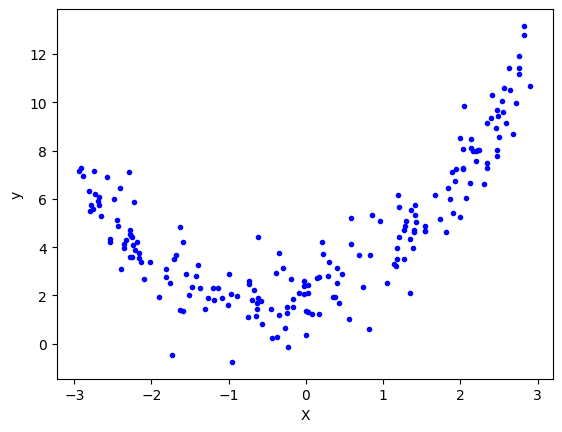

In [3]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.16933877734254554

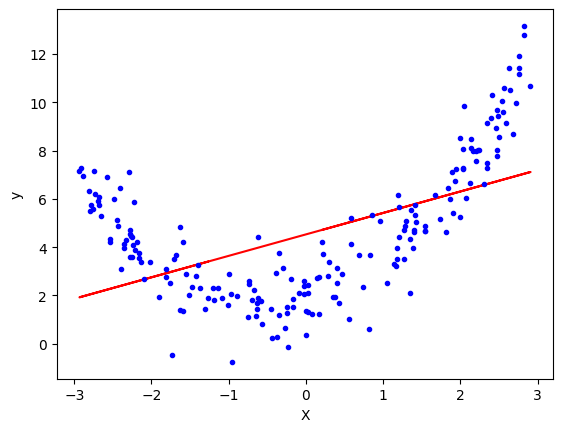

In [8]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
print(X_train[0])

print(X_train_trans[0])

[-1.26883639]
[ 1.         -1.26883639  1.60994578]


In [11]:
lr = LinearRegression()

lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test_trans)

In [13]:
r2_score(y_test,y_pred)

0.8766779675538201

In [14]:
print(lr.coef_)

print(lr.intercept_)

[[0.         0.87943487 0.8517138 ]]
[1.97940142]


In [15]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

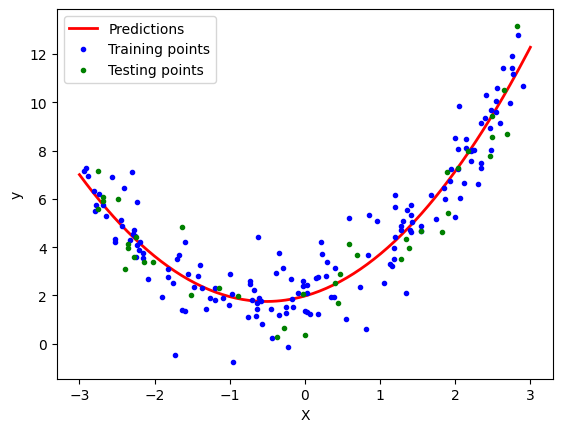

In [16]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_test, y_test, "g.", label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, 'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

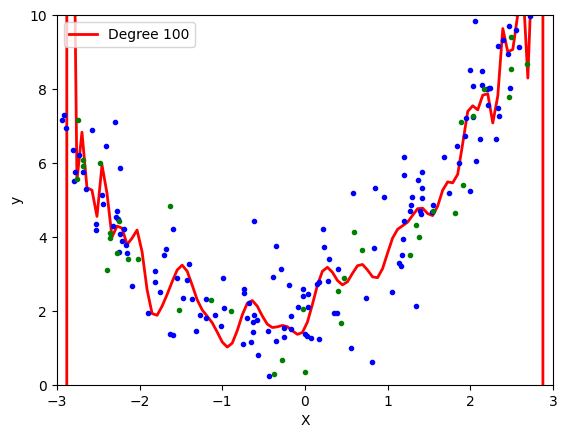

In [18]:
polynomial_regression(100)

In [19]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


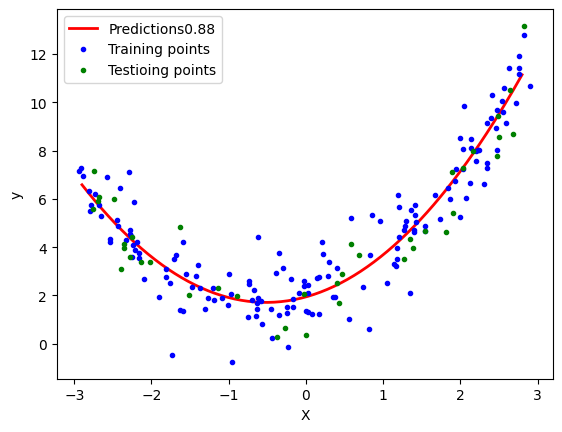

In [20]:
poly = PolynomialFeatures(degree = 2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter = 100)
sgd.fit(X_train_trans,y_train)

X_new = np.linspace(-2.9,2.8,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new  = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new,y_new,"r-",linewidth = 2, label = "Predictions" + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train,y_train,"b.",label = 'Training points')
plt.plot(X_test,y_test,"g.",label = 'Testioing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [21]:
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [22]:
df = px.data.iris()
fig = px.scatter_3d(df,x = x.ravel(),y = y.ravel(),z = z.ravel())
fig.show()

In [23]:
# import plotly.express as px

# # Load iris dataset
# df = px.data.iris()

# # Define your x, y, z variables (assuming you already have these defined)
# # Replace x, y, z with your actual variables
# x = df['sepal_length']
# y = df['sepal_width']
# z = df['petal_length']

# # Create the 3D scatter plot with color mapped to 'species' column
# fig = px.scatter_3d(df, x=x, y=y, z=z, color='species')

# # Modify the theme
# fig.update_layout(
#     template='plotly_dark',  # Change the template to 'plotly_dark' for a dark theme
#     font=dict(
#         family='Arial',  # Change font family
#         size=12,        # Change font size
#         color='white'   # Change font color
#     ),
#     title=dict(
#         text='3D Scatter Plot with Modified Theme',  # Change the title
#         font=dict(
#             size=20,  # Change title font size
#             color='white'  # Change title font color
#         )
#     ),
#     scene=dict(
#         xaxis=dict(title='X Axis'),  # Change x-axis title
#         yaxis=dict(title='Y Axis'),  # Change y-axis title
#         zaxis=dict(title='Z Axis')   # Change z-axis title
#     )
# )

# # Show the plot
# fig.show()

In [24]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid,yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [25]:
import plotly.graph_objects as go

fig = px.scatter_3d(df,x = x.ravel(),y=y.ravel(),z=z.ravel())

fig.add_trace(go.Surface(x = x_input,y = y_input,z = z_final))

fig.show()

In [26]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [27]:
poly = PolynomialFeatures(degree = 30)
X_multi_trans = poly.fit_transform(X_multi)

In [28]:
X_multi_trans.shape

(100, 496)

In [29]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [30]:
X_test_multi = poly.transform(final)

In [31]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [32]:
fig = px.scatter_3d(x = x.ravel(),y = y.ravel(),z = z.ravel())
fig.add_trace(go.Surface(x = x_input,y = y_input,z = z_final))

fig.update_layout(scene = dict(zaxis = dict(range = [0,35])))

fig.show()

In [33]:
import plotly.graph_objects as go
import plotly.express as px

# Assuming you have defined your data x, y, z, x_input, y_input, z_final

# Create a 3D scatter plot
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel(), color=z.ravel(), opacity=0.7,
                    color_continuous_scale='viridis')  # Adjust color scale as needed

# Add the surface plot
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final, colorscale='inferno', opacity=0.8))

# Update layout to improve appearance
fig.update_layout(scene=dict(
    xaxis=dict(backgroundcolor="rgb(200, 200, 230)"),
    yaxis=dict(backgroundcolor="rgb(230, 200,230)"),
    zaxis=dict(backgroundcolor="rgb(200,230,200)"),
    xaxis_title='X Axis Title',
    yaxis_title='Y Axis Title',
    zaxis_title='Z Axis Title',
    camera=dict(eye=dict(x=1.8, y=1.8, z=0.8)),
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode='manual'
))

# Show the plot
fig.show()